In [2]:
import networkx as nx
import graph_tool.all as gt

In [44]:
import math
import matplotlib.pyplot as plt

## Preprocessing of datasets
All datasets are converted from csv/edgelists to graphml format.

### Mouse visual cortex

`data/mouse_vc.graphml`

*Source*: [https://s3.amazonaws.com/connectome-graphs/mouse/mouse_visual.cortex_2.graphml]

### Yeast gene regulatory network

From `data/YRN.txt` to `data/yeast8k.graphml`

*Source*: [http://archive.gersteinlab.org/proj/Hierarchy_Rewiring/PNAS_hier/YRN.txt]

In [6]:
G = nx.read_adjlist(path="data/YRN.txt",delimiter="\t",nodetype=str,create_using=nx.DiGraph)
nx.write_graphml(G,path="data/yeast8k.graphml")

### E. Coli gene regulatory network

From `data/ERN.txt` to `data/ecoli2k.graphml`

*Source*: [http://archive.gersteinlab.org/proj/Hierarchy_Rewiring/PNAS_hier/ERN.txt]

In [16]:
G = nx.read_adjlist(path="data/ERN.txt",delimiter="\t",nodetype=str,create_using=nx.DiGraph)
nx.write_graphml(G,path="data/ecoli2k.graphml")

### Facebook Ego Network

From `data/facebook_combined.txt` to `data/fbego.graphml`

*Source*: [http://snap.stanford.edu/data/facebook.tar.gz]


In [17]:
G = nx.read_adjlist(path="data/facebook_combined.txt",delimiter="\t",nodetype=str,create_using=nx.DiGraph)
nx.write_graphml(G,path="data/fbego.graphml")

### Bitcoin Alpha trust Network

From `data/soc-sign-bitcoinalpha.csv.gz` to `data/bc.graphml`

*Source*: [https://snap.stanford.edu/data/soc-sign-bitcoinalpha.csv.gz]


In [5]:
G = nx.read_adjlist(path="data/soc-sign-bitcoinalpha.csv.gz",delimiter=",",nodetype=str,create_using=nx.DiGraph)
nx.write_graphml(G,path="data/bc.graphml")

### Python Dependency Network

From `data/requirements.csv` to `data/pydep.graphml`

*Source*: [http://kgullikson88.github.io/blog/Downloads/PypiDependencies/requirements.csv]


In [3]:
G = nx.read_adjlist(path="data/requirements.csv",delimiter=",",nodetype=str,create_using=nx.DiGraph)
nx.write_graphml(G,path="data/pydep.graphml")

In [22]:
yeast_g = gt.load_graph(file_name="data/yeast8k.graphml")
ecoli_g = gt.load_graph(file_name="data/ecoli2k.graphml")
mouse_g = gt.load_graph(file_name="data/mouse_vc.graphml")
fbego_g = gt.load_graph(file_name="data/fbego.graphml")
bitc_g  = gt.load_graph(file_name="data/bc.graphml")
pydep_g = gt.load_graph(file_name="data/pydep.graphml")

In [23]:
no_self_yeast_g = yeast_g.copy()
no_self_ecoli_g = ecoli_g.copy()
no_self_mouse_g = mouse_g.copy()
no_self_fbego_g = fbego_g.copy()
no_self_bitc_g  = bitc_g.copy()
no_self_pydep_g = pydep_g.copy()
for a_graph in [no_self_yeast_g,no_self_ecoli_g,no_self_mouse_g,no_self_fbego_g,no_self_bitc_g,no_self_pydep_g]:
    gt.remove_self_loops(a_graph)

In [93]:
plt.switch_backend("cairo")

In [41]:
ems = gt.motifs(no_self_yeast_g,3,return_maps=True)

In [101]:
n_motifs = len(ems[0])
base = math.ceil(math.sqrt(n_motifs))
height = math.floor(n_motifs/base)

In [111]:
fig, ax = plt.subplots(base, base, figsize=(20, 20))

In [118]:
for i,motif in enumerate(ems[0],1):
    # print(f"m{i}, #{ems[1][i-1]}")
    try:
        y = ((i-1) % base)
        x = math.floor((i-1)/base)
        ax[x,y].set_title(f"m{i}, #{ems[1][i-1]}")
        gt.graph_draw(motif,vertex_size=0.01,edge_size=0.01,mplfig=ax[x,y],nodesfirst=True)
    except IndexError:
        print(i,x,y)
    

/Users/giovanni/miniforge3/envs/gt/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:503: UserWarning: Unknown attribute: size
  warnings.warn("Unknown attribute: " + str(k), UserWarning)


In [117]:
fig.savefig("yay.svg")

m1, #20215


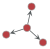

m2, #1467


m3, #112


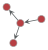

m4, #637


m5, #10


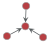

m6, #4


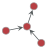

m7, #5


m8, #7


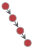

m9, #90


m10, #18


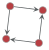

m11, #30


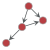

m12, #2


m13, #2


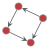

m14, #2


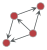

In [35]:
ems4 = gt.motifs(no_self_mouse_g,4)
for i,motif in enumerate(ems4[0],1):
    print(f"m{i}, #{ems4[1][i-1]}")
    gt.graph_draw(motif,output_size=(25,25))

m1, #211.10661245873942


m2, #-7.916722574804139


m3, #-13.346047512248605


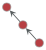

m4, #2.4661055033442834


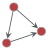

m5, #-0.6400901211577439


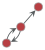

m6, #-0.6098671156015415


m7, #-0.35


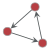

In [40]:
ems4 = gt.motif_significance(no_self_mouse_g,3,shuffle_model="erdos")
for i,motif in enumerate(ems4[0],1):
    print(f"m{i}, #{ems4[1][i-1]}")
    gt.graph_draw(motif,output_size=(25,25))